#**Kredi Onay Tahmini**

###*Bu proje, başvurunun bilgilerini analiz ederek banka tarafından kredinin onaylanıp onaylanmayacağını tahmin etmeyi amaçlamaktadır. Bu bilgiler, kredi miktarı, vade süresi, kredi geçmişi, eğitim, varlıklar ve birçok diğer değişkeni içermektedir. Bu proje aracılığıyla, kredi onayını etkileyen faktörleri analiz edebilir ve yeni bir başvurucu için kredi onay durumunu tahmin edebiliriz. Ayrıca, bu, kredilerinin daha muhtemelen onaylanacağı müşterilere öncelikli hizmetler sunmada yardımcı olacaktır.*

##**Veri Kümesi Hakkında**

###*Kredi onayı veri kümesi, kredi kurumundan kredi almak için bireylerin veya organizasyonların uygunluğunu belirlemek için kullanılan finansal kayıtların ve ilişkili bilgilerin bir koleksiyonudur. Bu, kredi geçmişi, gelir, istihdam durumu, kredi süresi, kredi miktarı, varlık değeri ve kredi durumu gibi çeşitli faktörleri içerir. Bu veri kümesi, verilen özelliklere dayalı olarak kredi onay olasılığını tahmin eden modeller ve algoritmalar geliştirmek için makine öğrenimi ve veri analizi alanında yaygın olarak kullanılmaktadır.*

##**Veri Sözlüğü**

| Sütun Adı            | Açıklama                                                             |
|-----------------------|----------------------------------------------------------------------|
| Loan_ID               | Kredi başvurusunu benzersiz bir şekilde tanımlayan kimlik numarası. Her başvurunun farklı bir kimliği vardır.      |
| Gender                | Başvuru sahibinin cinsiyetini belirtir. "Male" (Erkek) veya "Female" (Kadın) değerlerini alabilir.           |
| Married               | Başvuru sahibinin medeni durumunu gösterir. "Yes" (Evet) veya "No" (Hayır) değerlerini alabilir.               |
| Dependents            | Başvuru sahibinin bakmakla yükümlü olduğu kişi sayısını ifade eder. "0", "1", "2", "3+" gibi değerler alabilir.|
| Education             | Başvuru sahibinin eğitim seviyesini belirtir. "Graduate" (Mezun) veya "Not Graduate" (Mezun Değil) değerlerini alabilir.|
| Self_Employed         | Başvuru sahibinin serbest meslek sahibi olup olmadığını ifade eder. "Yes" (Evet) veya "No" (Hayır) değerlerini alabilir.|
| Applicant Income      | Başvuru sahibinin kişisel gelirini belirtir. |
| Co-Applicant Income   | Başvuru sahibinin birlikte başvurduğu kişinin gelirini belirtir. |
| Loan Amount           | Başvurulan kredi miktarını ifade eder. |
| Loan Amount Term      | Kredinin geri ödeme süresini ifade eder. Örneğin, 360 ay (30 yıl) gibi bir değer alabilir. |
| Credit History        | Başvuru sahibinin kredi geçmişini belirtir. "1" (Kredi geçmişi var) veya "0" (Kredi geçmişi yok) değerlerini alabilir. |
| Property Area         | Başvuru sahibinin mal sahibi olduğu bölgeyi gösterir. "Rural" (Kırsal), "Semiurban" (Yarı Kırsal) veya "Urban" (Şehirsel) gibi değerlerini alabilir. |
| Loan Status           | Kredi başvurusunun onay durumunu ifade eder. "Y" (Yes) veya "N" (No) gibi değerlerini alarak kredi başvurusunun onaylanıp onaylanmadığını gösterir. |


In [ ]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [ ]:
df=pd.read_csv('/content/loan_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,Co Applicant Income,Loan Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##**Data Prepocessing**

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', ' Applicant Income', 'Co Applicant Income',
       'Loan Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [ ]:
df.shape

(614, 13)

In [ ]:
df=df.drop(columns=["Loan_ID"],axis=1)

In [ ]:
df.mode()

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,Co Applicant Income,Loan Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,2500,0.0,120.0,360.0,1.0,Semiurban,Y


In [ ]:
df.dtypes

Gender                  object
Married                 object
Dependents              object
Education               object
Self_Employed           object
 Applicant Income        int64
Co Applicant Income    float64
Loan Amount            float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area           object
Loan_Status             object
dtype: object

<ipython-input-6-fe32485a8e17>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[" Applicant Income"])


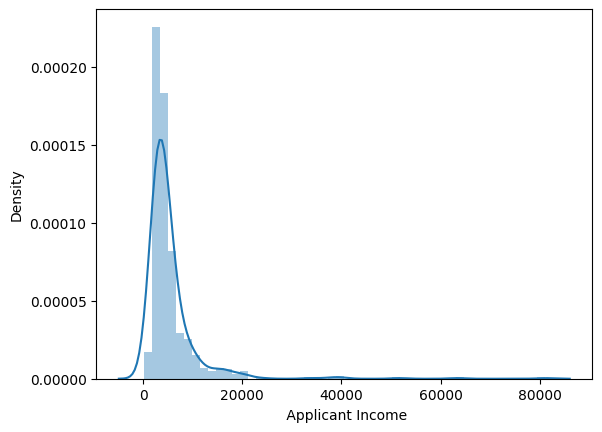

In [ ]:
sns.distplot(df[" Applicant Income"])
plt.show()

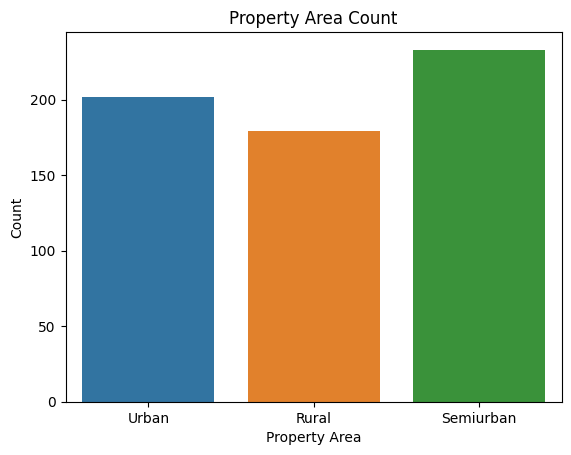

In [ ]:
sns.countplot(data=df, x="Property_Area")

plt.title("Property Area Count")
plt.xlabel("Property Area")
plt.ylabel("Count")

plt.show()

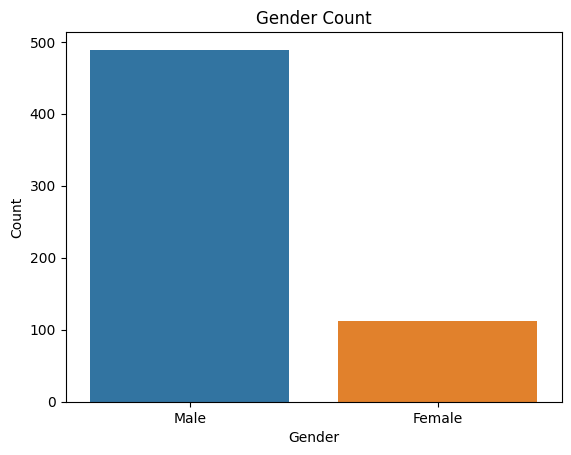

In [ ]:
sns.countplot(data=df, x="Gender")

plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()

Text(0, 0.5, 'Count')

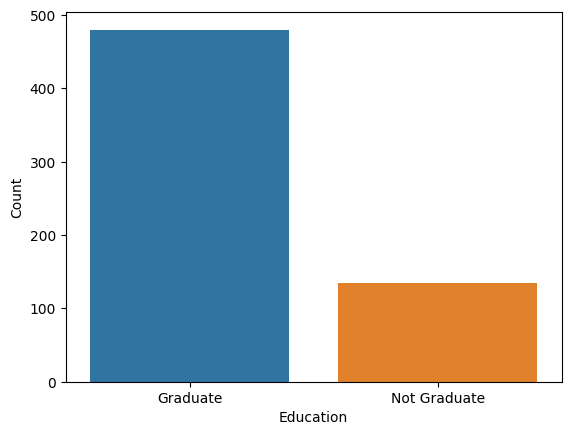

In [ ]:
sns.countplot(data=df, x="Education")

plt.xlabel("Education")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

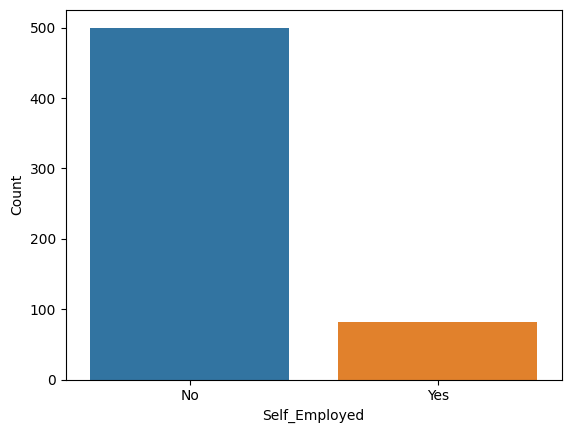

In [ ]:
sns.countplot(data=df, x="Self_Employed")

plt.xlabel("Self_Employed")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

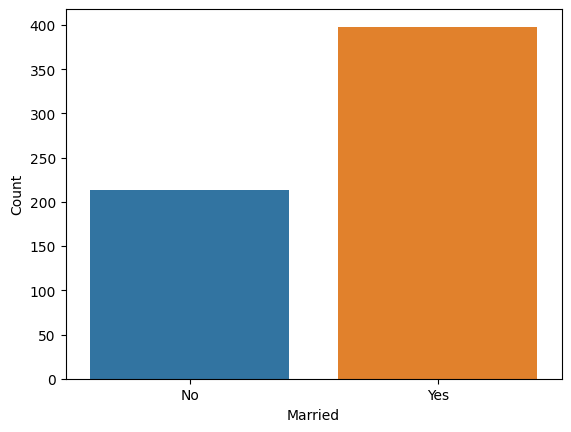

In [ ]:
sns.countplot(data=df, x="Married")

plt.xlabel("Married")
plt.ylabel("Count")

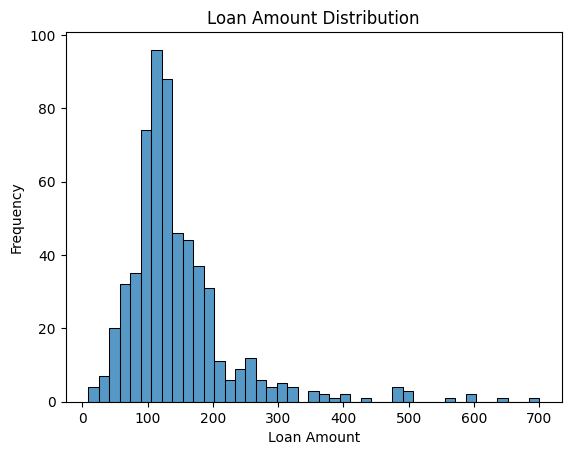

In [ ]:
sns.histplot(df["Loan Amount"])

plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")

plt.show()

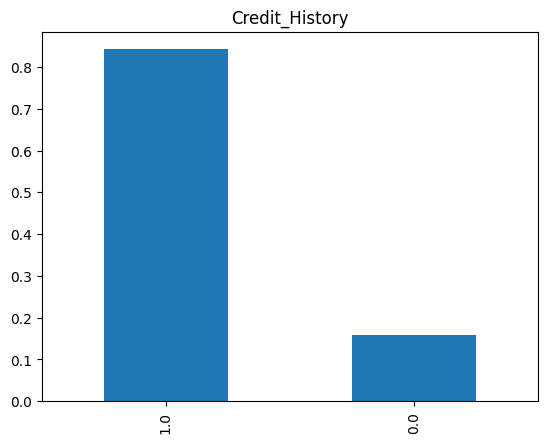

In [ ]:
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

<ipython-input-14-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

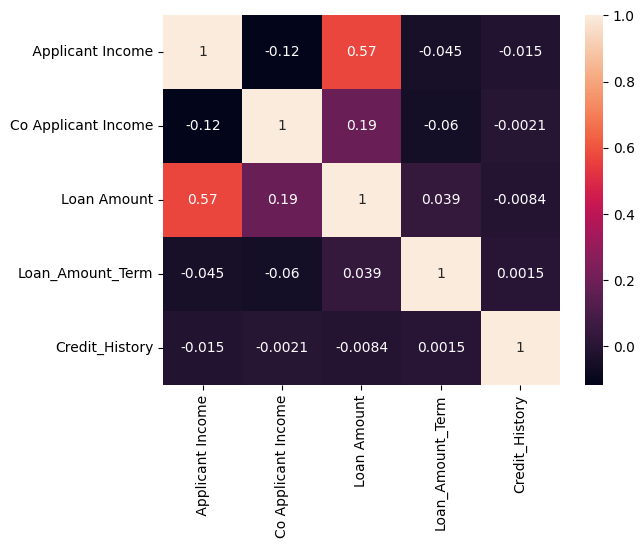

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.dtypes

Gender                  object
Married                 object
Dependents              object
Education               object
Self_Employed           object
 Applicant Income        int64
Co Applicant Income    float64
Loan Amount            float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area           object
Loan_Status             object
dtype: object

In [ ]:
df.describe()

,Applicant Income,Co Applicant Income,Loan Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.mean()

<ipython-input-17-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


 Applicant Income      5403.459283
Co Applicant Income    1621.245798
Loan Amount             146.412162
Loan_Amount_Term        342.000000
Credit_History            0.842199
dtype: float64

In [ ]:
df.count()

Gender                 601
Married                611
Dependents             599
Education              614
Self_Employed          582
 Applicant Income      614
Co Applicant Income    614
Loan Amount            592
Loan_Amount_Term       600
Credit_History         564
Property_Area          614
Loan_Status            614
dtype: int64

In [ ]:
df.isnull().any()

Gender                  True
Married                 True
Dependents              True
Education              False
Self_Employed           True
 Applicant Income      False
Co Applicant Income    False
Loan Amount             True
Loan_Amount_Term        True
Credit_History          True
Property_Area          False
Loan_Status            False
dtype: bool

In [ ]:
df.isnull().sum()

Gender                 13
Married                 3
Dependents             15
Education               0
Self_Employed          32
 Applicant Income       0
Co Applicant Income     0
Loan Amount            22
Loan_Amount_Term       14
Credit_History         50
Property_Area           0
Loan_Status             0
dtype: int64

In [ ]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:

df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [ ]:
df['Loan Amount']=df['Loan Amount'].fillna(df['Loan Amount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df.isnull().any()

Gender                 False
Married                False
Dependents             False
Education              False
Self_Employed          False
 Applicant Income      False
Co Applicant Income    False
Loan Amount            False
Loan_Amount_Term       False
Credit_History         False
Property_Area          False
Loan_Status            False
dtype: bool

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,Co Applicant Income,Loan Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
df.mean()

<ipython-input-37-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Gender                    0.817590
Married                   0.653094
Dependents                0.744300
Education                 0.218241
Self_Employed             0.133550
 Applicant Income      5403.459283
Co Applicant Income    1621.245798
Loan Amount             146.412162
Loan_Amount_Term        342.000000
Credit_History            0.842199
Property_Area             1.037459
dtype: float64

In [ ]:
le=LabelEncoder()

In [ ]:
df.Gender=le.fit_transform(df.Gender)
df.Married=le.fit_transform(df.Married)
df.Education=le.fit_transform(df.Education)
df.Self_Employed=le.fit_transform(df.Self_Employed)
df.Property_Area=le.fit_transform(df.Property_Area)
df.Loan_Status=le.fit_transform(df.Loan_Status)
df.Dependents=le.fit_transform(df.Dependents)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,Co Applicant Income,Loan Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
x=df.iloc[:,:-1]
y=df.Loan_Status

In [ ]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,Co Applicant Income,Loan Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

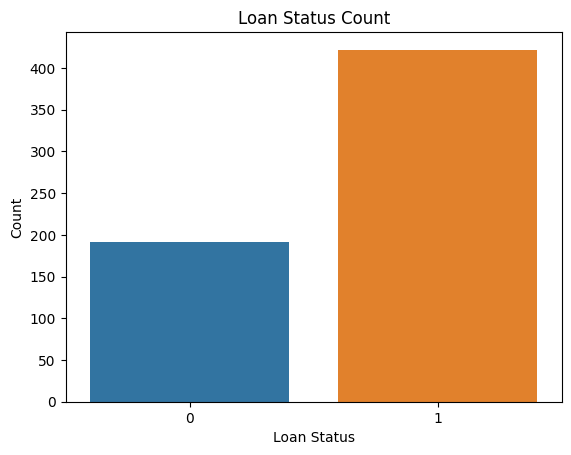

In [ ]:
# "Loan_Status" sütununu kategorik bir sütun olarak işaretle
df["Loan_Status"] = df["Loan_Status"].astype("category")

# Şimdi "Loan_Status" sütununu doğru bir şekilde görselleştirebilirsiniz
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Loan_Status")

plt.title("Loan Status Count")
plt.xlabel("Loan Status")
plt.ylabel("Count")

plt.show()


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
xtrain.head()


,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,Co Applicant Income,Loan Amount,Loan_Amount_Term,Credit_History,Property_Area
245,1,0,0,0,1,6050,4333.0,120.0,180.0,1.0,2
413,1,1,0,1,0,2253,2033.0,110.0,360.0,1.0,0
126,1,1,3,0,0,23803,0.0,370.0,360.0,1.0,0
531,1,1,3,0,0,4281,0.0,100.0,360.0,1.0,2
188,1,1,0,0,1,674,5296.0,168.0,360.0,1.0,0


In [ ]:
xtest.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,Co Applicant Income,Loan Amount,Loan_Amount_Term,Credit_History,Property_Area
285,1,0,0,0,0,3158,3053.0,89.0,360.0,1.000000,0
323,0,0,0,0,0,3166,2985.0,132.0,360.0,0.842199,0
482,1,1,0,0,0,2083,3150.0,128.0,360.0,1.000000,1
173,1,1,0,0,0,5708,5625.0,187.0,360.0,1.000000,1
518,1,0,0,0,0,4683,1915.0,185.0,360.0,1.000000,1


In [ ]:
ytrain.head()

245    0
413    1
126    1
531    1
188    1
Name: Loan_Status, dtype: int64

In [ ]:
ytest.head()

285    1
323    1
482    1
173    1
518    0
Name: Loan_Status, dtype: int64

In [ ]:
xtrain.shape

(429, 11)

In [ ]:
xtest.shape

(185, 11)

In [ ]:
ytrain.shape

(429,)

In [ ]:
ytest.shape

(185,)

##**Modelleme**

###**Decision Tree**

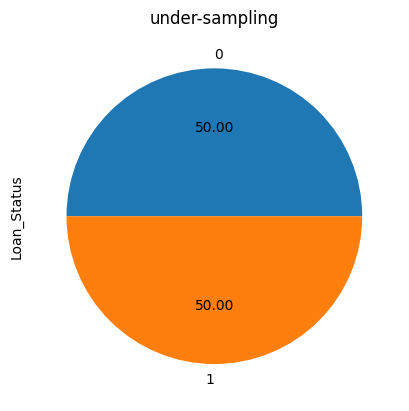

In [ ]:
rus=RandomUnderSampler(sampling_strategy=1)
x_res,y_res=rus.fit_resample(x,y)
ax=y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("under-sampling")

In [ ]:
dmodel=DecisionTreeClassifier(random_state=100)

In [ ]:
dmodel.fit(x_res,y_res)


DecisionTreeClassifier(random_state=100)

In [ ]:
ypredd=dmodel.predict(xtest)

In [ ]:
ypred2d=dmodel.predict(xtrain)

In [ ]:
print("Decision Tree Model Testing Accuracy")
print(accuracy_score(ytest,ypredd))
print("Decision Tree Model Training Accuracy")
print(accuracy_score(ytrain,ypred2d))

Decision Tree Model Testing Accuracy
0.8540540540540541
Decision Tree Model Training Accuracy
0.8601398601398601


##**Random Forest**

In [ ]:
Rmodel=RandomForestClassifier(n_estimators=100)

In [ ]:
Rmodel.fit(x_res,y_res)

RandomForestClassifier()

In [ ]:
ypredR=Rmodel.predict(xtest)

In [ ]:
ypred2R=Rmodel.predict(xtrain)

In [ ]:
print("Random Forest Model Testing Accuracy")
print(accuracy_score(ytest,ypredR))
print("Random Forest Model Training Accuracy")
print(accuracy_score(ytrain,ypred2R))

Random Forest Model Testing Accuracy
0.9027027027027027
Random Forest Model Training Accuracy
0.9254079254079254


In [ ]:
kmodel=KNeighborsClassifier()

In [ ]:
kmodel.fit(x_res,y_res)

KNeighborsClassifier()

In [ ]:
ypredk=kmodel.predict(xtest)

In [ ]:
ypred2k=kmodel.predict(xtrain)

In [ ]:
print("KNN Model Testing Accuracy")
print(accuracy_score(ytest,ypredk))
print("KNN Model Training Accuracy")
print(accuracy_score(ytrain,ypred2k))

KNN Model Testing Accuracy
0.6108108108108108
KNN Model Training Accuracy
0.627039627039627


## Sonuçlar

Keşifsel veri analizi sonuçlarına göre, kredi onayı için aşağıdaki faktörlerin önemli olduğunu söyleyebiliriz:

- **CIBIL Puanı**: Daha yüksek CIBIL puanına sahip kişilerin kredi onaylama şansı daha yüksektir.

- **Bakmakla Yükümlü Kişi Sayısı**: Daha fazla bakmakla yükümlü kişisi olan kişilerin kredi onaylama şansı daha düşüktür.

- **Varlıklar**: Daha fazla varlığa sahip olan kişiler (taşınabilir ve taşınmazlar dahil) kredi onaylama şansına sahiptir.

- **Kredi Miktarı ve Vadeli**: Daha yüksek kredi miktarına ve daha kısa vadeli kredilere sahip kişilerin kredi onaylama şansı daha yüksektir.

Makine öğrenimi modellerine gelince, Decision Tree Classifier ve Random Forest Classifier kullanılmıştır. Her iki model de mükemmel sonuçlar vermiş ve sırasıyla %86 ve %92,5  doğruluk oranlarına sahiptir. Ancak Decision Random Forest, ClassifierTree'den   daha iyi sonuçlar vermiştir.




